In [2]:
import pandas as pd
import numpy as np

csv_path = '../../Binance_Merge_AGGdepth_OI_Taker.csv'

df = pd.read_csv(csv_path)

second_2_csv = 'mean_reversion_.csv'

all_sr_csv   = 'trend_.csv'
 

df['price_chg']=df['Close'].pct_change()
df


,Unnamed: 0,datetime,Volume,Close,taker_buy_vol,taker_sell_vol,taker_sel_buy_ratio,start_time_x,end_time_x,open_interest,low,open,high,askssUsd,asksAmount,start_time_y,bidsAmount,end_time_y,bidsUsd,price_chg
0,0,2024-09-05 08:00:00,3.611413e+08,56984.0,1.766561e+08,1.844853e+08,0.957562,1725523200000,1725526799000,2.929767e+10,2.910845e+10,2.918629e+10,2.930658e+10,6.566767e+07,1146.556,1725523200,788.261,1729122200,4.498289e+07,NaN
1,1,2024-09-05 09:00:00,6.178824e+08,56768.0,2.984248e+08,3.194576e+08,0.934161,1725526800000,1725530399000,2.931916e+10,2.918817e+10,2.929767e+10,2.940060e+10,4.506482e+07,788.355,1725526800,946.816,1729125800,5.389654e+07,-0.003791
2,2,2024-09-05 10:00:00,3.703885e+08,56745.9,1.911700e+08,1.792185e+08,1.066687,1725530400000,1725533999000,2.938246e+10,2.927436e+10,2.931916e+10,2.941219e+10,4.688842e+07,823.430,1725530400,937.037,1729129400,5.312167e+07,-0.000389
3,3,2024-09-05 11:00:00,2.897858e+08,56666.1,1.602766e+08,1.295093e+08,1.237569,1725534000000,1725537599000,2.939166e+10,2.931884e+10,2.938246e+10,2.942752e+10,4.814538e+07,845.818,1725534000,1064.353,1729133000,6.031025e+07,-0.001406
4,4,2024-09-05 12:00:00,1.158487e+09,56639.0,5.641575e+08,5.943294e+08,0.949234,1725537600000,1725541199000,2.935708e+10,2.917309e+10,2.939166e+10,2.945955e+10,4.638605e+07,815.952,1725537600,1171.485,1729136600,6.630448e+07,-0.000478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2555,2024-12-20 19:00:00,8.785741e+08,97079.6,4.460199e+08,4.325542e+08,1.031131,1734721200000,1734724799000,6.221086e+10,6.220178e+10,6.227676e+10,6.260141e+10,7.923182e+07,814.488,1734721200,947.385,1738320200,9.165848e+07,0.001278
2556,2556,2024-12-20 20:00:00,8.188863e+08,96426.6,3.916679e+08,4.272184e+08,0.916786,1734724800000,1734728399000,6.181387e+10,6.181387e+10,6.221086e+10,6.226064e+10,8.106530e+07,832.552,1734724800,937.477,1738323800,9.082709e+07,-0.006726
2557,2557,2024-12-20 21:00:00,1.244285e+09,96602.6,6.086979e+08,6.355871e+08,0.957694,1734728400000,1734731999000,6.151873e+10,6.091726e+10,6.181387e+10,6.182199e+10,7.739124e+07,799.730,1734728400,1180.368,1738327400,1.136056e+08,0.001825
2558,2558,2024-12-20 22:00:00,5.015017e+08,97419.9,2.673029e+08,2.341988e+08,1.141350,1734732000000,1734735599000,6.208223e+10,6.147905e+10,6.151873e+10,6.209337e+10,7.821752e+07,807.480,1734732000,861.923,1738331000,8.307724e+07,0.008460


In [3]:
def forward(sharpe_train,df_test,rolling_window, multiplier, multiplier_2, sr_multiplier, fees, backtest_mode):
    df = df_test
    df['sma'] = df['open_interest'].rolling(window=rolling_window).mean()
    df['std']      = df['open_interest'].rolling(window=rolling_window).std()
    df['standard-oi']    = (df['open_interest']-df['sma'])/df['std']    
    df['diffaskbid']   = df['askssUsd'] - df ['bidsUsd']
    df['ma_diffaskbid'] = df['diffaskbid'].rolling(window=rolling_window).mean() 
    df['std_diffaskbid']      = df['diffaskbid'].rolling(window=rolling_window).std()
    df['standard_diffaskbid']    = (df['diffaskbid']-df['ma_diffaskbid'])/df['std_diffaskbid']  

       # sma=np.nan_to_num(sma_sma)
    rang_1 = 0
    position = np.array([0.0] * len(df))

        
    # position entry exit logic
    long_trade = 0
    short_trade = 0
    # loopp all the zscore for entry and exit based on threshold
    if backtest_mode == "trend":
        for i in range(1, len(position)):
            if df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] <= -multiplier_2 :
                position[i] = 1
                # previous position = 0 or -1 , current position = 1
                if position[i-1] != position[i]:
                    long_trade += 1

            elif df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] >= multiplier_2 : # 1 * -1.0 = -1
                position[i] = -1
                # previous position = 1 or 0, current position = -1
                if position[i-1] != position[i]:
                    short_trade += 1

            # elif df['oi_ls'][i] <= sma[i] and position [i-1] == 1:
            #     position [i] = 0

            # elif df['oi_ls'][i] >= sma[i] and position [i-1] == -1:
            #     position [i] = 0

            else:
                position[i] = position[i-1] # previous position = 1, current position = 1

            # else:
            #     position [i] = 0
    else:
        for i in range(1, len(position)):
            if df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] >= multiplier_2 :

                position[i] = -1
                # previous position = 1 or 0, current position = -1
                if position[i-1] != position[i]:
                    short_trade += 1

            elif df['standard-oi'][i] <= -multiplier and df['standard_diffaskbid'][i] <= -multiplier_2 :  # 1 * -1.0 = -1
                position[i] = 1
                # previous position = 0 or -1 , current position = 1
                if position[i-1] != position[i]:
                    long_trade += 1

            # elif df['oi_ls'][i] <= sma[i] and position [i-1] == -1:
            #     position [i] = 0

            # elif df['oi_ls'][i] >= sma[i] and position [i-1] == 1:
            #     position [i] = 0

            else:
                position[i] = position[i-1] # previous position = 1, current position = 1
            
            # else :
            #     position [i] =0

        # Calculate performance 
    interval_pnl = [0]
    trades = [0]

    # trades = np.array([0.0] * len(df))
    # get the trades
    for i in range(1,len(df)):
        # if previous position is not same as current position , mean got trade executed
        # example, previous position = 0, current position = -1 , trades = 0 - (-1) = 1
        # previous position = 0, current position = 1 , trades = 0 - 1 = abs(-1) = 1
        # previous position = 1, current position = -1 , trades = 1 - (-1) = abs(2) = 2
        # previous position = -1, current position = 1 , trades = -1 - 1 = abs(-2) = 2
        if position[i-1] != position[i]:
            trades.append(abs(position[i-1] - position[i]))
        else:
            trades.append(0)
    # calculate the PnL by using trades and position, and also fees 
    price_change = df['price_chg'].values
    for i in range(1,len(df)):
        interval_pnl.append(position[i-1] * price_change[i] - trades[i] * fees / 100)
    df['pnl'] = interval_pnl
    df['position'] = position
    df['trade'] = trades
    df['cumu'] = df['pnl'].cumsum()
    df['dd'] = df['cumu'] - df['cumu'].cummax()

    # mdd = df['dd'].min
    dd= df['dd'].values
    mdd = min(dd)

    # performance report
    # mdd = min(interval_pnl)
    # mean of PnL
    mean = np.mean(interval_pnl)
    # standard deviation of PnL
    stddev = np.std(interval_pnl)

    # SR multiplier => daily data = 365 * 1
    #                  1 hour data = 365 * 24
    # Sharpe ratio = mean of pnl / std of pnl * square root of (365 * sr_multiplier)
    sharpe_ratio = mean / stddev * np.sqrt(365 * sr_multiplier)
    
    # Performance report
    data = {
            'rolling_window': rolling_window,
            'multiplier': multiplier,
            'multiplier_2' : multiplier_2 ,
            'num_of_trades': np.sum(trades),
            'long_trades': long_trade,
            'short_trades': short_trade,
            'cumu': df['cumu'].iat[-1],
            'AR': mean * 365 * sr_multiplier,
            'MDD': mdd,
            'CR': mean * 365 * sr_multiplier / abs(mdd),
            'SR_t' : sharpe_train,
            'SR': sharpe_ratio 
        }
    
    return data

In [22]:
def backtesting(df,df_test,rolling_window, multiplier, multiplier_2, sr_multiplier, fees, backtest_mode):
    
    df['sma'] = df['open_interest'].rolling(window=rolling_window).mean()
    df['std']      = df['open_interest'].rolling(window=rolling_window).std()
    df['standard-oi']    = (df['open_interest']-df['sma'])/df['std']    
    df['diffaskbid']   = df['askssUsd'] - df ['bidsUsd']
    df['ma_diffaskbid'] = df['diffaskbid'].rolling(window=rolling_window).mean() 
    df['std_diffaskbid']      = df['diffaskbid'].rolling(window=rolling_window).std()
    df['standard_diffaskbid']    = (df['diffaskbid']-df['ma_diffaskbid'])/df['std_diffaskbid']    
    # sma=np.nan_to_num(sma_sma)
    rang_1 = 0
    position = np.array([0.0] * len(df))

        
    # position entry exit logic
    long_trade = 0
    short_trade = 0
    # loopp all the zscore for entry and exit based on threshold
    if backtest_mode == "trend":
        for i in range(1, len(position)):
            if df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] <= -multiplier_2 :
                position[i] = 1
                # previous position = 0 or -1 , current position = 1
                if position[i-1] != position[i]:
                    long_trade += 1

            elif df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] >= multiplier_2 : # 1 * -1.0 = -1
                position[i] = -1
                # previous position = 1 or 0, current position = -1
                if position[i-1] != position[i]:
                    short_trade += 1

            # elif df['oi_ls'][i] <= sma[i] and position [i-1] == 1:
            #     position [i] = 0

            # elif df['oi_ls'][i] >= sma[i] and position [i-1] == -1:
            #     position [i] = 0

            else:
                position[i] = position[i-1] # previous position = 1, current position = 1

            # else:
            #     position [i] = 0
    else:
        for i in range(1, len(position)):
            if df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] >= multiplier_2 :

                position[i] = -1
                # previous position = 1 or 0, current position = -1
                if position[i-1] != position[i]:
                    short_trade += 1

            elif df['standard-oi'][i] <= -multiplier and df['standard_diffaskbid'][i] <= -multiplier_2 :  # 1 * -1.0 = -1
                position[i] = 1
                # previous position = 0 or -1 , current position = 1
                if position[i-1] != position[i]:
                    long_trade += 1

            # elif df['oi_ls'][i] <= sma[i] and position [i-1] == -1:
            #     position [i] = 0

            # elif df['oi_ls'][i] >= sma[i] and position [i-1] == 1:
            #     position [i] = 0

            else:
                position[i] = position[i-1] # previous position = 1, current position = 1
            
            # else :
            #     position [i] =0


    # trades and pnl calculation
    # After done entry and exit logic
    # Calculate performance 
    interval_pnl = [0]
    trades = [0]

    # trades = np.array([0.0] * len(df))
    # get the trades
    for i in range(1,len(df)):
        # if previous position is not same as current position , mean got trade executed
        # example, previous position = 0, current position = -1 , trades = 0 - (-1) = 1
        # previous position = 0, current position = 1 , trades = 0 - 1 = abs(-1) = 1
        # previous position = 1, current position = -1 , trades = 1 - (-1) = abs(2) = 2
        # previous position = -1, current position = 1 , trades = -1 - 1 = abs(-2) = 2
        if position[i-1] != position[i]:
            trades.append(abs(position[i-1] - position[i]))
        else:
            trades.append(0)
    # calculate the PnL by using trades and position, and also fees 
    price_change = df['price_chg'].values
    for i in range(1,len(df)):
        interval_pnl.append(position[i-1] * price_change[i] - trades[i] * fees / 100)
    df['pnl'] = interval_pnl
    df['position'] = position
    df['trade'] = trades
    df['cumu'] = df['pnl'].cumsum()
    df['dd'] = df['cumu'] - df['cumu'].cummax()

    # mdd = df['dd'].min
    dd= df['dd'].values
    mdd = min(dd)
    
    # performance report
    # mdd = min(interval_pnl)
    # mean of PnL
    mean = np.mean(interval_pnl)
    # standard deviation of PnL
    stddev = np.std(interval_pnl)

    # SR multiplier => daily data = 365 * 1
    #                  1 hour data = 365 * 24
    # Sharpe ratio = mean of pnl / std of pnl * square root of (365 * sr_multiplier)
    sharpe_ratio_train = mean / stddev * np.sqrt(365 * sr_multiplier)

    if sharpe_ratio_train >= 1 and np.sum(trades) > 50 :
        result = forward(sharpe_train= sharpe_ratio_train,df_test= df_test,rolling_window = rolling_window, multiplier = multiplier, multiplier_2 =multiplier_2, sr_multiplier =sr_multiplier, fees =fees , backtest_mode =  backtest_mode)
    else :
        result = {   
            'rolling_window': rolling_window,
            'multiplier': multiplier,
            'multiplier_2' : 0 ,
            'num_of_trades': 0,
            'long_trades': 0,
            'short_trades': 0,
            'cumu': 0,
            'AR': 0,
            'MDD': 0,
            'CR': 0,
            'SR' :0
        }
        
    

    return result


In [ ]:
# loop all params needed to backtest 
rolling_window_array = np.arange(4, 52, 4)
z_score_threshold_array = np.arange(0, 3, 0.1)
zscore_threshold_array_second = np.arange(0, 3, 0.1)
backtest_mode_arr = ["trend", "mr"]
split_ratio =  3/10
split       =  int(len(df) * split_ratio)

df_trai = df[:split]
split2       =  int(split - 52)
c = df[split2:].reset_index(drop=True)
# # 定義將測試集拆分為兩部分的比例，例如各佔一半
# split_test_ratio = 0.5
# split_test_point = int(len(df_test) * split_test_ratio)

# # 拆分測試集為兩部分
# df_test1 = df_test[:split_test_point]
# df_test2 = df_test[split_test_point:]

for backtest_mode in backtest_mode_arr:
    print(backtest_mode)
    all_result = []
    for zscore_thresh_2 in zscore_threshold_array_second :   
        for rolling_window in rolling_window_array:
            for z_score_threshold in z_score_threshold_array:
                backtest_1 = backtesting(df_trai,df_test=c,rolling_window=rolling_window, multiplier=z_score_threshold,multiplier_2=zscore_thresh_2, sr_multiplier=24, fees=0.06, backtest_mode=backtest_mode)
                # print(backtest_1)
                if backtest_mode == 'trend' :
                    all_result.append(backtest_1)
                    all_sr = pd.DataFrame(all_result)
                    print(all_sr)
                
                else :
                    all_result.append(backtest_1)
                    second = pd.DataFrame(all_result)
                    print(second)

    # df_pivot = all_sr.pivot(index="rolling_window",columns ='multiplier', values="SR")
    # import matplotlib.pyplot as plt
    # import seaborn as sns
    # # Create a heatmap
    # plt.figure(figsize=(30, 10))
    # sns.heatmap(df_pivot,annot=True, cmap='RdYlGn')
    # # Show the plot
    # plt.show()

In [22]:
all_sr_2 = all_sr.dropna(how ='all')
all_sr_2.to_csv(all_sr_csv)
second_2 = second.dropna(how = 'all')
second_2.to_csv(second_2_csv)

In [ ]:
# loop all params needed to backtest 
rolling_window_array = np.arange(4, 52, 4)
z_score_threshold_array = np.arange(0, 3, 0.1)
# zscore_threshold_array_second = np.arange(0, 3, 0.1)
backtest_mode_arr = ["trend", "mr"]
split_ratio =  3/10
split       =  int(len(df) * split_ratio)

df_trai = df[:split]
split2       =  int(split - 52)
c = df[split2:].reset_index(drop=True)
# # 定義將測試集拆分為兩部分的比例，例如各佔一半
# split_test_ratio = 0.5
# split_test_point = int(len(df_test) * split_test_ratio)

# # 拆分測試集為兩部分
# df_test1 = df_test[:split_test_point]
# df_test2 = df_test[split_test_point:]

for backtest_mode in backtest_mode_arr:
    print(backtest_mode)
    all_result = []
    if backtest_mode == 'trend' :
        for rolling_window in rolling_window_array:
            for z_score_threshold in z_score_threshold_array:
                        backtest_1 = backtesting(df_trai,df_test=c,rolling_window=rolling_window, multiplier=z_score_threshold,multiplier_2=1.2, sr_multiplier=24, fees=0.06, backtest_mode=backtest_mode)
                        # print(backtest_1)
                        
                        all_result.append(backtest_1)
        all_sr = pd.DataFrame(all_result)
        df_pivot = all_sr.pivot(index="rolling_window",columns ='multiplier', values="SR")   
                     
    
    else :
        for rolling_window in rolling_window_array:
                   for z_score_threshold in z_score_threshold_array:
                        backtest_1 = backtesting(df_trai,df_test=c,rolling_window=rolling_window, multiplier=z_score_threshold,multiplier_2=1.2, sr_multiplier=24, fees=0.06, backtest_mode=backtest_mode)
                        # print(backtest_1)
                        all_result.append(backtest_1)
        second = pd.DataFrame(all_result)
        df_pivot_2 = second.pivot(index="rolling_window",columns ='multiplier', values="SR")
    
 
          
   
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Create a heatmap
    plt.figure(figsize=(30, 10))
    sns.heatmap(df_pivot,annot=True, cmap='RdYlGn')
    # Show the plot
    plt.show()



In [ ]:
## entry analys
def analys(df ,rolling_window, multiplier, multiplier_2, sr_multiplier, fees, backtest_mode):
    df 
    df['sma'] = df['open_interest'].rolling(window=rolling_window).mean()
    df['std']      = df['open_interest'].rolling(window=rolling_window).std()
    df['standard-oi']    = (df['open_interest']-df['sma'])/df['std']    
    df['diffaskbid']   = df['askssUsd'] - df ['bidsUsd']
    df['ma_diffaskbid'] = df['diffaskbid'].rolling(window=rolling_window).mean() 
    df['std_diffaskbid']      = df['diffaskbid'].rolling(window=rolling_window).std()
    df['standard_diffaskbid']    = (df['diffaskbid']-df['ma_diffaskbid'])/df['std_diffaskbid']  

       # sma=np.nan_to_num(sma_sma)
    rang_1 = 0
    position = np.array([0.0] * len(df))

        
    # position entry exit logic
    long_trade = 0
    short_trade = 0
    # loopp all the zscore for entry and exit based on threshold
    if backtest_mode == "trend":
        for i in range(1, len(position)):
            if df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] <= -multiplier_2 :
                position[i] = 1
                # previous position = 0 or -1 , current position = 1
                if position[i-1] != position[i]:
                    long_trade += 1

            elif df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] >= multiplier_2 : # 1 * -1.0 = -1
                position[i] = -1
                # previous position = 1 or 0, current position = -1
                if position[i-1] != position[i]:
                    short_trade += 1

            # elif df['oi_ls'][i] <= sma[i] and position [i-1] == 1:
            #     position [i] = 0

            # elif df['oi_ls'][i] >= sma[i] and position [i-1] == -1:
            #     position [i] = 0

            else:
                position[i] = position[i-1] # previous position = 1, current position = 1

            # else:
            #     position [i] = 0
    else:
        for i in range(1, len(position)):
            if df['standard-oi'][i] >= multiplier and df['standard_diffaskbid'][i] >= multiplier_2 :

                position[i] = -1
                # previous position = 1 or 0, current position = -1
                if position[i-1] != position[i]:
                    short_trade += 1

            elif df['standard-oi'][i] <= -multiplier and df['standard_diffaskbid'][i] <= -multiplier_2 :  # 1 * -1.0 = -1
                position[i] = 1
                # previous position = 0 or -1 , current position = 1
                if position[i-1] != position[i]:
                    long_trade += 1

            # elif df['oi_ls'][i] <= sma[i] and position [i-1] == -1:
            #     position [i] = 0

            # elif df['oi_ls'][i] >= sma[i] and position [i-1] == 1:
            #     position [i] = 0

            else:
                position[i] = position[i-1] # previous position = 1, current position = 1
            
            # else :
            #     position [i] =0

        # Calculate performance 
    interval_pnl = [0]
    trades = [0]

    # trades = np.array([0.0] * len(df))
    # get the trades
    for i in range(1,len(df)):
        # if previous position is not same as current position , mean got trade executed
        # example, previous position = 0, current position = -1 , trades = 0 - (-1) = 1
        # previous position = 0, current position = 1 , trades = 0 - 1 = abs(-1) = 1
        # previous position = 1, current position = -1 , trades = 1 - (-1) = abs(2) = 2
        # previous position = -1, current position = 1 , trades = -1 - 1 = abs(-2) = 2
        if position[i-1] != position[i]:
            trades.append(abs(position[i-1] - position[i]))
        else:
            trades.append(0)
    # calculate the PnL by using trades and position, and also fees 
    price_change = df['price_chg'].values
    for i in range(1,len(df)):
        interval_pnl.append(position[i-1] * price_change[i] - trades[i] * fees / 100)
    df['pnl'] = interval_pnl
    df['position'] = position
    df['trade'] = trades
    df['cumu'] = df['pnl'].cumsum()
    df['dd'] = df['cumu'] - df['cumu'].cummax()
    # mdd = df['dd'].min
    dd= df['dd'].values
    mdd = min(dd)
    ttrades_list = trades.tolist()  # 將 trades 轉換為列表
    
    # performance report
    # mdd = min(interval_pnl)
    # mean of PnL
    mean = np.mean(interval_pnl)
    # standard deviation of PnL
    stddev = np.std(interval_pnl)

    # SR multiplier => daily data = 365 * 1
    #                  1 hour data = 365 * 24
    # Sharpe ratio = mean of pnl / std of pnl * square root of (365 * sr_multiplier)
    sharpe_ratio = mean / stddev * np.sqrt(365 * sr_multiplier)
    
    # Performance report
    data = {
            'rolling_window': rolling_window,
            'multiplier': multiplier,
            'multiplier_2' : multiplier_2 ,
            'num_of_trades': np.sum(trades),
            'long_trades': long_trade,
            'short_trades': short_trade,
            'cumu': df['cumu'].iat[-1],
            'AR': mean * 365 * sr_multiplier,
            'trade' : trades ,
            'pos': position ,
                    'MDD': mdd,
            'CR': mean * 365 * sr_multiplier / abs(mdd),
            'SR': sharpe_ratio 
        }
    
    return data

In [ ]:
param_1 = 44
param_2 = 0.3
param_3 = 1.2
data_2 = analys(df,rolling_window=param_1, multiplier=param_2,multiplier_2=param_3, sr_multiplier=24, fees=0.06, backtest_mode='mr')

TypeError: backtesting() missing 3 required positional arguments: 'sr_multiplier', 'fees', and 'backtest_mode'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 假設 df 中包含以下欄位：
#   df['date']：日期或時間序列
#   df['close']：收盤價
#   df['pos']：倉位 (-1, 0, 1等)
#   df['trade']：標誌有無交易(或進場/出場)
# 你可以根據自己邏輯對這些欄位做調整

# 先確保 df['date'] 是能被 matplotlib 正確識別的格式 (比如是 datetime 或 數字)
# 若不是，請先做轉換:
#   df['date'] = pd.to_datetime(df['date'])
pos_list = pd.Series(data_2['pos'])
trade_list = pd.Series(data_2['trade'])

df['pos']  = pos_list
df['trade'] = trade_list


fig, ax = plt.subplots(figsize=(12, 6))

# 繪製收盤價
ax.plot(df['datetime'], df['Close'], label='Close Price', color='black')

# 假設當 df['trade'] != 0 時，表示當前有交易行為（可能是開或平倉）
# 那麼可以透過對比 pos 前後來判斷是由 1 -> -1 還是 -1 -> 1
for i in range(1, len(df)):
    # 如果 trade != 0，則表示該位置有交易行為
    if df['trade'].iat[i] != 0:
        prev_pos = df['pos'].iat[i-1]
        curr_pos = df['pos'].iat[i]
        
        # 如果前一個pos是 1，現在是 -1 => 關多 / 開空
        if prev_pos == 1 and curr_pos == -1:
            ax.annotate('Close Long / Open Short', 
                        xy=(df['datetime'].iat[i], df['Close'].iat[i]),
                        xytext=(0, 10),  # 箭頭文字偏移，可視情況調整
                        textcoords='offset points',
                        arrowprops=dict(arrowstyle='->', color='red'),
                        color='red', ha='center')

        # 如果前一個pos是 -1，現在是 1 => 關空 / 開多
        elif prev_pos == -1 and curr_pos == 1:
            ax.annotate('Close Short / Open Long', 
                        xy=(df['date'].iat[i], df['close'].iat[i]),
                        xytext=(0, -15),
                        textcoords='offset points',
                        arrowprops=dict(arrowstyle='->', color='green'),
                        color='green', ha='center')

# 也可以用 scatter 畫一個向上/向下三角符號，取代箭頭
# 例如：
# for i in range(1, len(df)):
#     if df['trade'].iat[i] != 0:
#         prev_pos = df['pos'].iat[i-1]
#         curr_pos = df['pos'].iat[i]
#         if prev_pos == 1 and curr_pos == -1:
#             ax.scatter(df['date'].iat[i], df['close'].iat[i], 
#                        marker='v', color='red', s=100, label='Close Long/Open Short')
#         elif prev_pos == -1 and curr_pos == 1:
#             ax.scatter(df['date'].iat[i], df['close'].iat[i], 
#                        marker='^', color='green', s=100, label='Close Short/Open Long')

# 美化
ax.set_title('Price with Entry and Exit Points')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()
plt.show()


trend


/var/folders/sc/br8qxbts38z1106xrqfhwrkc0000gn/T/ipykernel_33771/200490136.py:91: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = mean / stddev * np.sqrt(365 * sr_multiplier)
/var/folders/sc/br8qxbts38z1106xrqfhwrkc0000gn/T/ipykernel_33771/200490136.py:102: RuntimeWarning: invalid value encountered in scalar divide
  'CR': mean * 365 * sr_multiplier / abs(mdd),


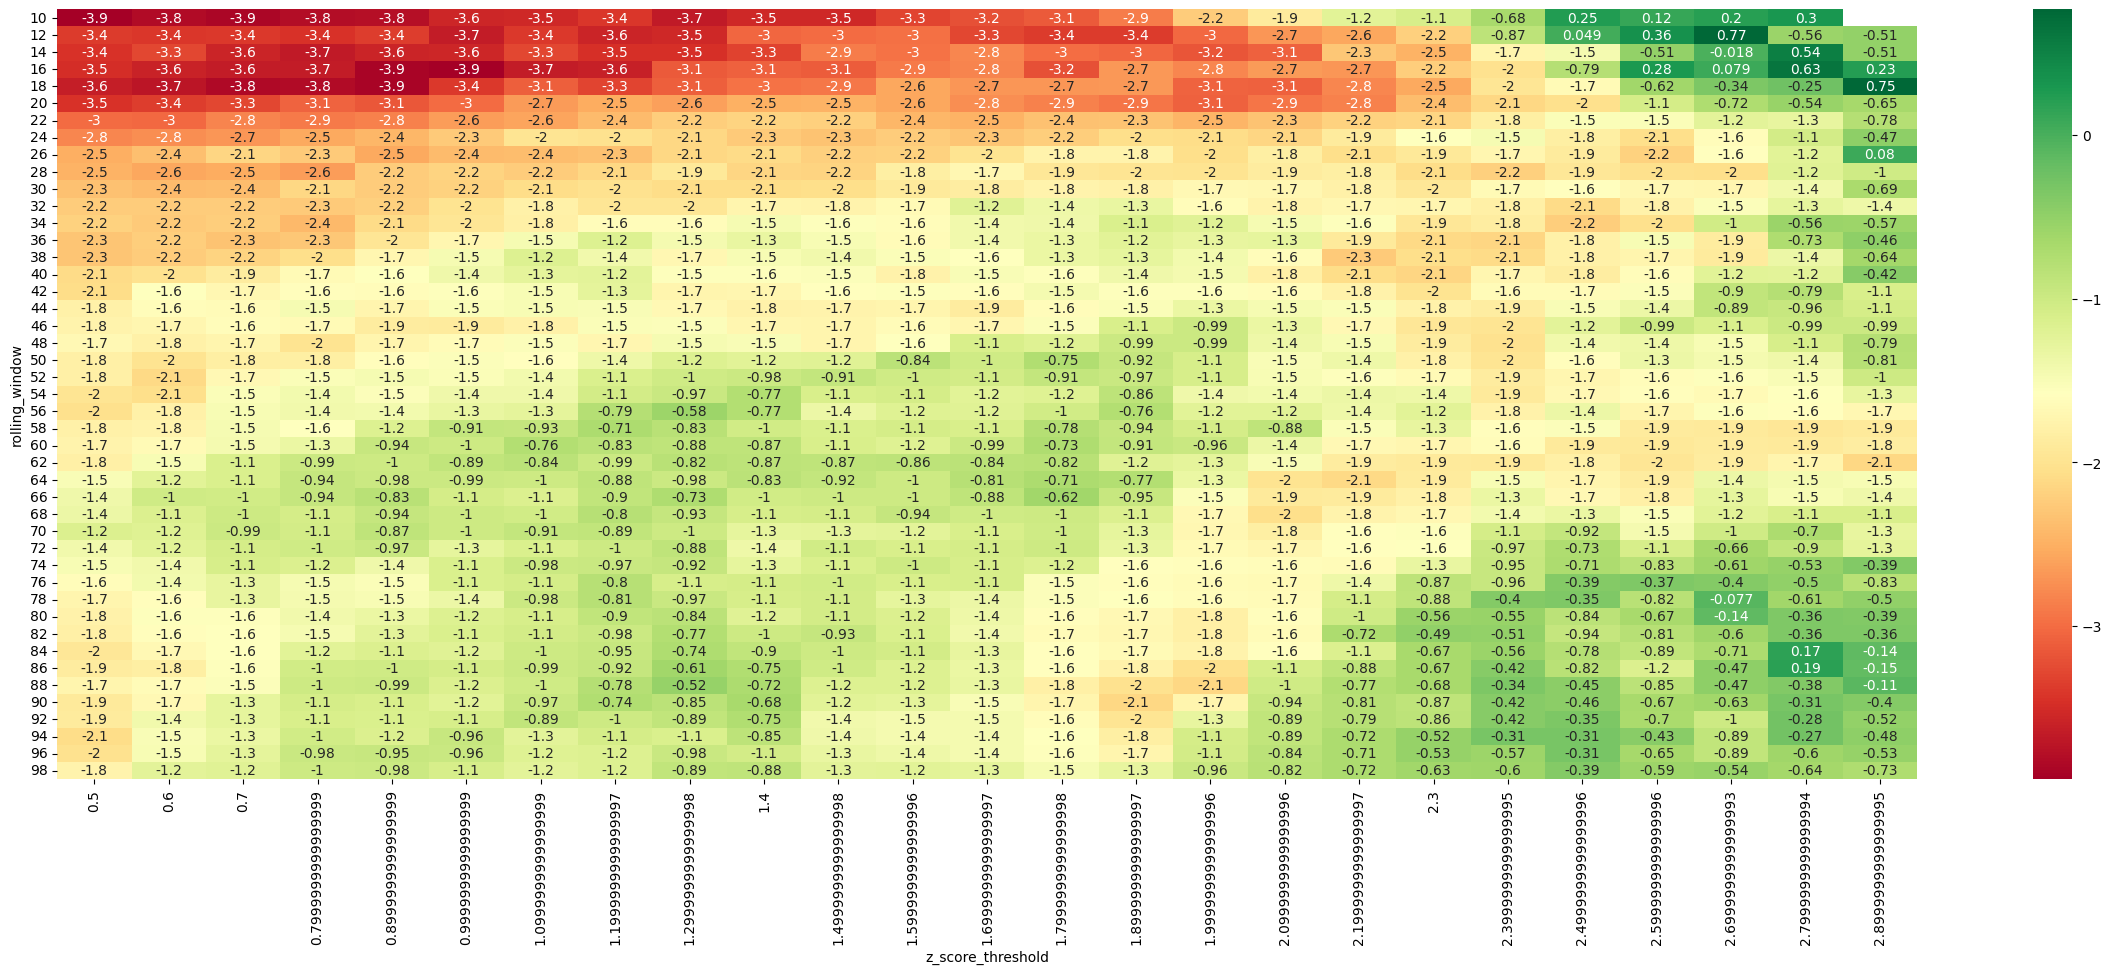

mr


/var/folders/sc/br8qxbts38z1106xrqfhwrkc0000gn/T/ipykernel_33771/200490136.py:91: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = mean / stddev * np.sqrt(365 * sr_multiplier)
/var/folders/sc/br8qxbts38z1106xrqfhwrkc0000gn/T/ipykernel_33771/200490136.py:102: RuntimeWarning: invalid value encountered in scalar divide
  'CR': mean * 365 * sr_multiplier / abs(mdd),


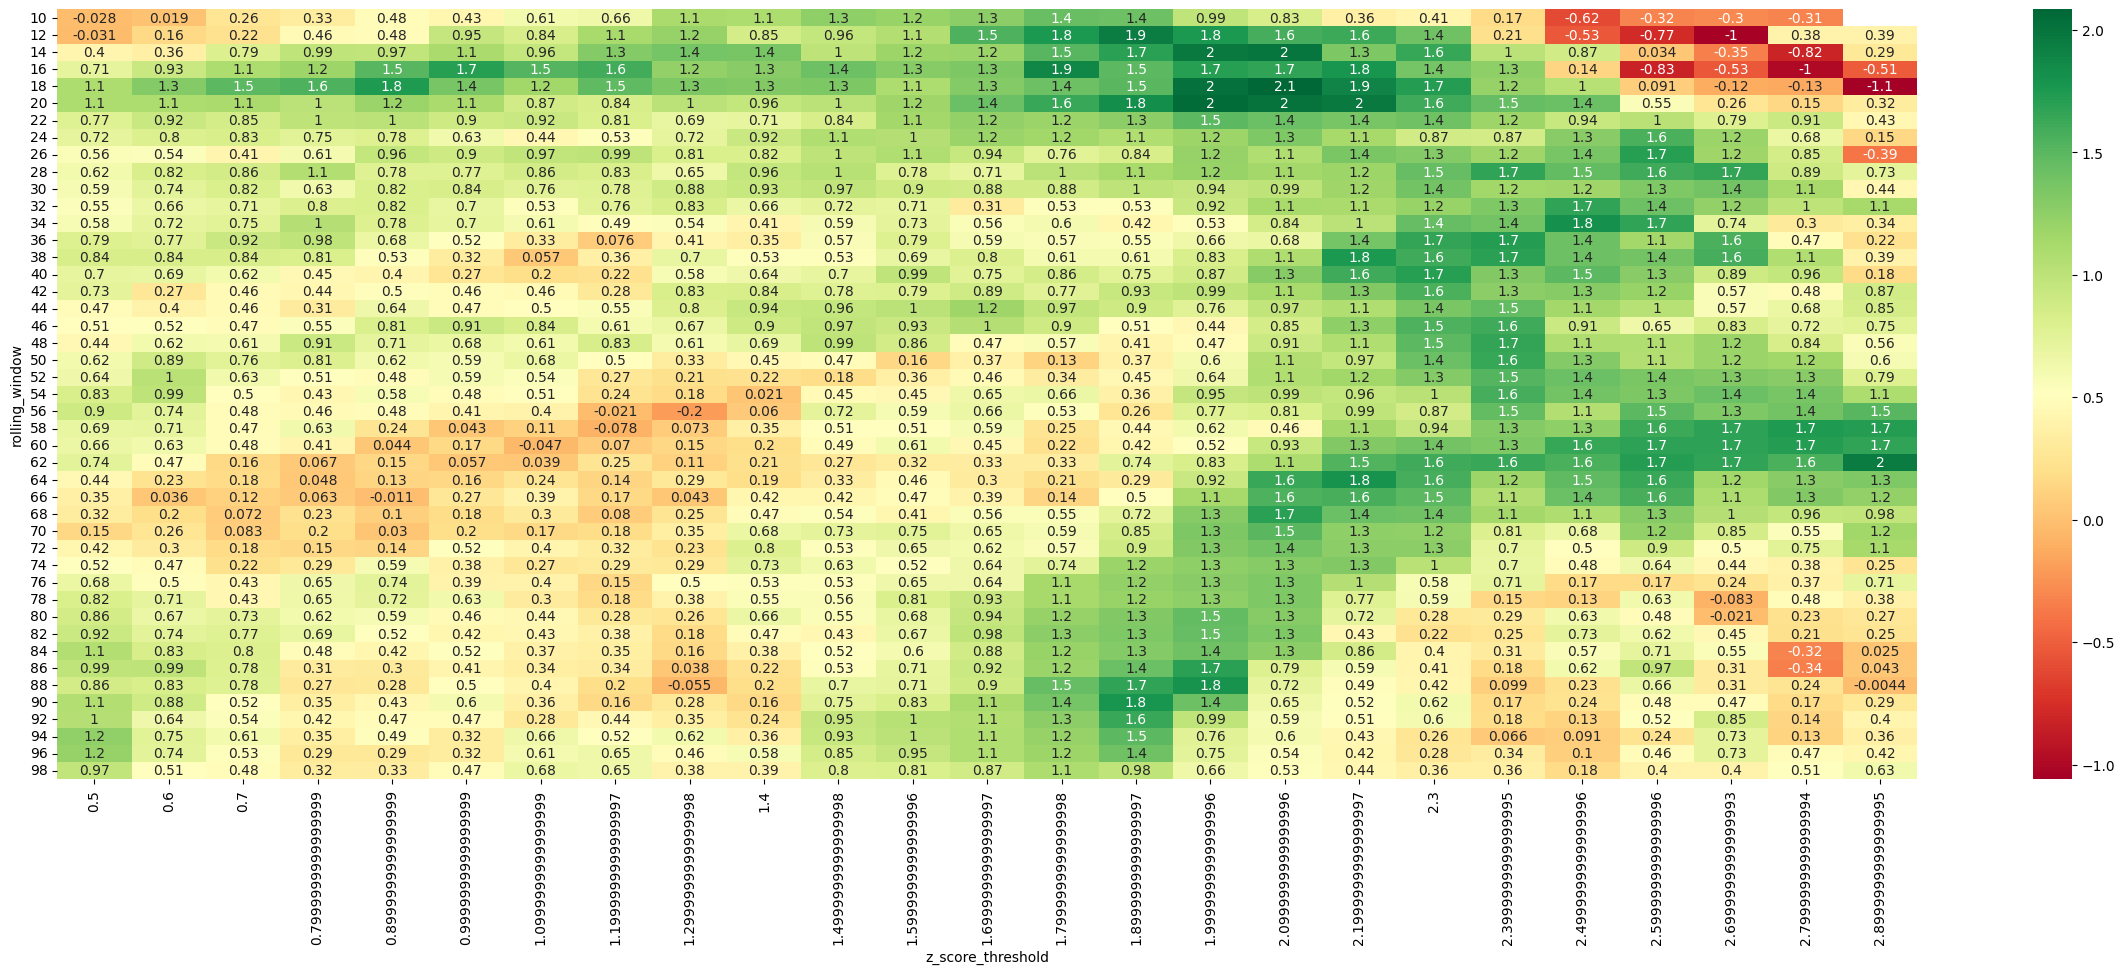

In [55]:
# loop all params needed to backtest 
rolling_window_array = np.arange(10, 100, 2)
z_score_threshold_array = np.arange(0.5, 3, 0.1)
backtest_mode_arr = ["trend", "mr"]
for backtest_mode in backtest_mode_arr:
    print(backtest_mode)
    all_result = []
    for rolling_window in rolling_window_array:
        for z_score_threshold in z_score_threshold_array:
            backtest_1 = backtesting(rolling_window=rolling_window, z_score_threshold=z_score_threshold, sr_multiplier=24, fees=0.06, backtest_mode=backtest_mode)
            # print(backtest_1)
            all_result.append(backtest_1)
    all_sr = pd.DataFrame(all_result)
    df_pivot = all_sr.pivot(index="rolling_window",columns ='z_score_threshold', values="SR")
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Create a heatmap
    plt.figure(figsize=(30, 10))
    sns.heatmap(df_pivot,annot=True, cmap='RdYlGn')
    # Show the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

backtesting(63,2.2,24,0.06,'mr')

df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['cumu'], label='Cumu PnL', color='blue')
ax1.set_xlabel('Time', color='black')
ax1.set_ylabel('Cumu PnL', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(df.index, df['close_y'], label='Close Price', color='black')
ax2.set_ylabel('Close Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.suptitle('Backtest Result Cumulative PnL and Close Price', color='black')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), frameon=False, fontsize=10, title_fontsize='13', title='Legend')
ax1.grid(True)

plt.show()